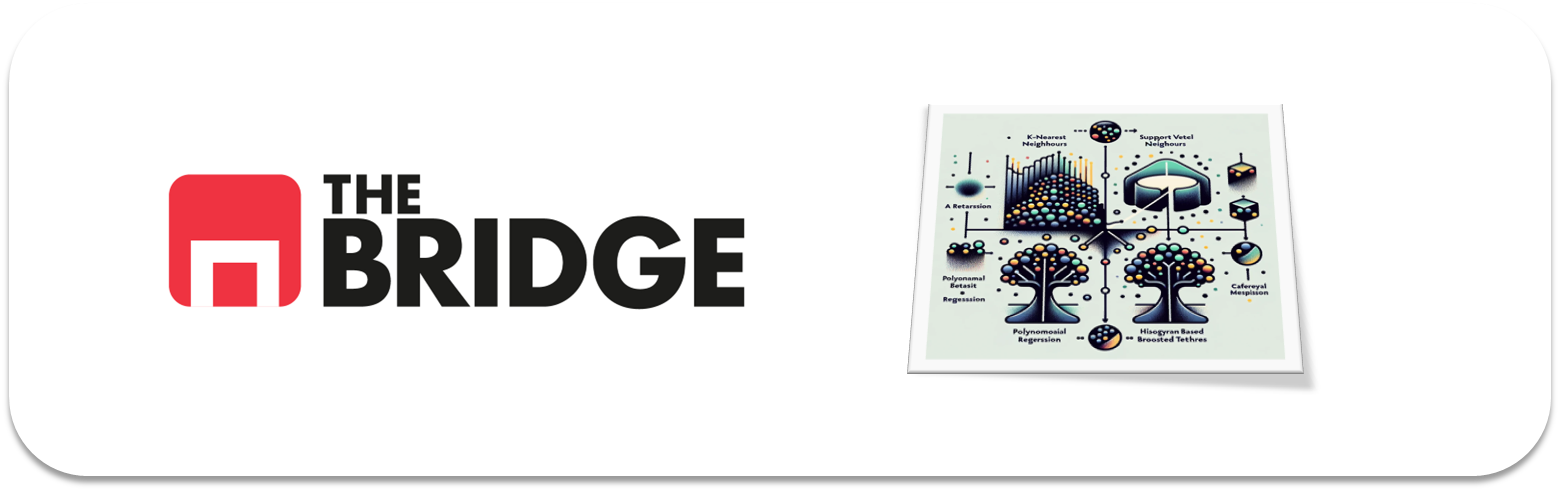

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [224]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [188]:
df= pd.read_csv('./data/credit_npo.csv')

In [189]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [191]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

DESCRIPCION COLUMNAS:
SeriousDlqin2yrs (binaria): Indica si ha habido impagos en los últimos 2 años.

RevolvingUtilizationOfUnsecuredLines (float64): Tasa de utilización de líneas de crédito no garantizadas (revolving credit). 

Edad 

NumberOfTime30-59DaysPastDueNotWorse (int64): Número de veces que un individuo ha estado entre 30 y 59 días en mora, pero no más grave.

DebtRatio (float64): Relación deuda/ingreso. Es la proporción de deuda total mensual frente al ingreso total mensual.

MonthlyIncome (float64): Ingreso mensual 

NumberOfOpenCreditLinesAndLoans (int64): Número de líneas de crédito y prestamo abiertas 

NumberOfTimes90DaysLate (int64): Número de veces que un individuo ha estado en mora durante 90 días o más.
R
NumberRealEstateLoansOrLines (int64): Número de préstamos inmobiliarios o líneas de crédito relacionadas con bienes 

NumberOfTime60-89DaysPastDueNotWorse (int64): Número de veces que un individuo ha estado entre 60 y 89 días en mora, pero no más grave.

NumberOfDependents (float64): Número de dependientes declarados 


In [192]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) 
    # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [193]:
umbral_cat = 15
umbral_num = 30


In [194]:
card_tipo(df, umbral_categoria= umbral_cat, umbral_continua=umbral_num)

,Card,%_Card,Tipo,tipo_sugerido
SeriousDlqin2yrs,2,0.015953,int64,Binaria
RevolvingUtilizationOfUnsecuredLines,10764,85.857861,float64,Numerica continua
age,78,0.622158,int64,Numerica discreta
NumberOfTime30-59DaysPastDueNotWorse,10,0.079764,int64,Categorica
DebtRatio,11547,92.103374,float64,Numerica continua
MonthlyIncome,4167,33.237617,float64,Numerica continua
NumberOfOpenCreditLinesAndLoans,43,0.342985,int64,Numerica discreta
NumberOfTimes90DaysLate,13,0.103693,int64,Categorica
NumberRealEstateLoansOrLines,16,0.127622,int64,Numerica discreta
NumberOfTime60-89DaysPastDueNotWorse,8,0.063811,int64,Categorica


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Es un problema de clasificacion supervisado, donde hay que predecir si una persona va a encontrarse en dificultades financieras en los dos próximos años.

In [195]:
#renombramos la columna target
df.rename(columns = {'SeriousDlqin2yrs': 'target'}, inplace=True)

In [196]:
target = 'target'

In [197]:
# Nos cargamos nulos
df.dropna(inplace=True)

In [198]:
df

,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


### #1.3
Pinta la distribución de frecuencias del target y coméntala

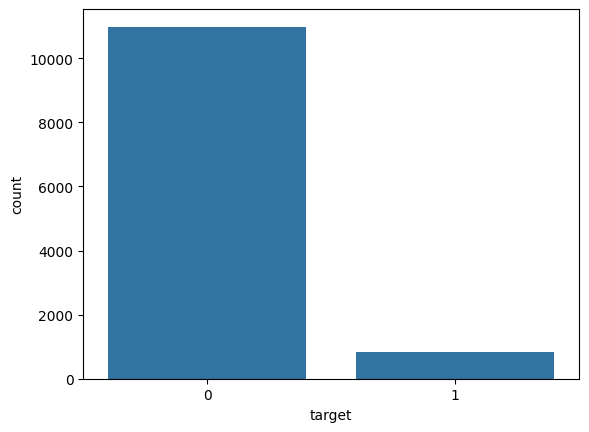

In [199]:
sns.countplot(data=df, x='target');


El target no està balanceado!

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [200]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42) 

In [201]:
train_set

,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
11145,0,0.391240,68,0,2.693124,2166.0,13,0,2,0,0.0
2012,0,0.906540,59,0,0.325227,6496.0,7,0,0,0,1.0
5428,0,0.933223,52,1,0.372442,8258.0,3,0,1,0,3.0
12130,0,0.857859,50,0,0.511098,5225.0,9,0,1,0,0.0
36,0,0.000000,61,0,0.414167,5166.0,5,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11966,0,0.397822,53,0,0.332584,11560.0,14,0,2,0,0.0
5512,0,0.015171,76,0,0.005427,3500.0,4,0,0,0,0.0
5719,0,0.988201,62,0,0.450432,8442.0,4,0,1,0,0.0
922,0,0.122072,41,0,0.638133,3749.0,9,0,1,0,1.0


In [202]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [203]:
train_set

,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
11145,0,0.391240,68,0,2.693124,2166.0,13,0,2,0,0.0
2012,0,0.906540,59,0,0.325227,6496.0,7,0,0,0,1.0
5428,0,0.933223,52,1,0.372442,8258.0,3,0,1,0,3.0
12130,0,0.857859,50,0,0.511098,5225.0,9,0,1,0,0.0
36,0,0.000000,61,0,0.414167,5166.0,5,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11966,0,0.397822,53,0,0.332584,11560.0,14,0,2,0,0.0
5512,0,0.015171,76,0,0.005427,3500.0,4,0,0,0,0.0
5719,0,0.988201,62,0,0.450432,8442.0,4,0,1,0,0.0
922,0,0.122072,41,0,0.638133,3749.0,9,0,1,0,1.0


In [204]:
corr_col = train_set.corr(numeric_only=True)

In [205]:
#calculo las correlac con el resto de variables, 
#y estàn en valor absoluto
np.abs(train_set.corr()['target']).sort_values(ascending=False)

target                                  1.000000
RevolvingUtilizationOfUnsecuredLines    0.284084
NumberOfTime30-59DaysPastDueNotWorse    0.126015
NumberOfTimes90DaysLate                 0.125070
age                                     0.107801
NumberOfTime60-89DaysPastDueNotWorse    0.094215
NumberOfDependents                      0.038829
NumberOfOpenCreditLinesAndLoans         0.032472
MonthlyIncome                           0.018163
DebtRatio                               0.001863
NumberRealEstateLoansOrLines            0.001677
Name: target, dtype: float64

In [206]:
corr = np.abs(train_set.corr(numeric_only=True)[target]).sort_values(ascending=False)

# Features con menos de 0.05 de correlación vs el target
bad_corr_feat = corr[corr < 0.05].index.values

#QUITO LAS COLUMNAS QUE TENGAN BAJA CORR
# Filtramos las columnas buenas
train_set.drop(columns=bad_corr_feat, inplace=True)

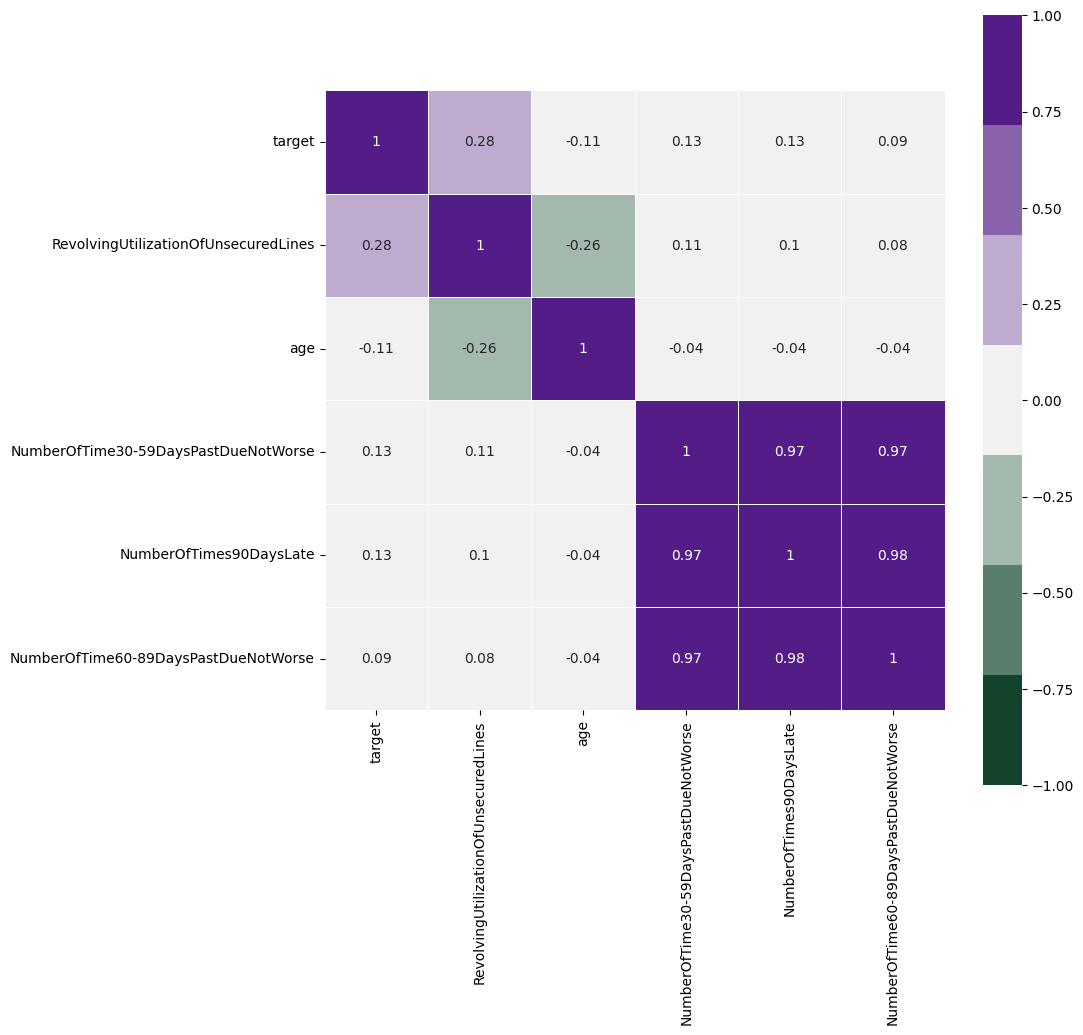

In [207]:
#dibujo la matrix de corr quitando ya las columnas que tenian poca correlacion
plt.figure(figsize=(10,10))
sns.heatmap(np.round(train_set.corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [208]:
train_set.columns.tolist()

['target',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [209]:
features_num = train_set.describe().columns.tolist()

In [210]:
#analisis de colinealidad
#Colinealidad
criterio_col = 0.8
excluidas = []
for col in features_num:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr_col[col].items():
            # print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    # print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                #else:
                    #print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            # else:
            #     print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con target
soy yo misma, no me excluyo
Voy a comprobar la colinealidad con RevolvingUtilizationOfUnsecuredLines
soy yo misma, no me excluyo
Voy a comprobar la colinealidad con age
soy yo misma, no me excluyo
Voy a comprobar la colinealidad con NumberOfTime30-59DaysPastDueNotWorse
soy yo misma, no me excluyo
Voy a comprobar la colinealidad con NumberOfTimes90DaysLate
Voy a comprobar la colinealidad con NumberOfTime60-89DaysPastDueNotWorse


In [211]:
excluidas

['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']

In [212]:
for col in excluidas:
  features_num.remove(col)


In [213]:
features_num

['target',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse']

In [214]:
features = features_num.remove('target')

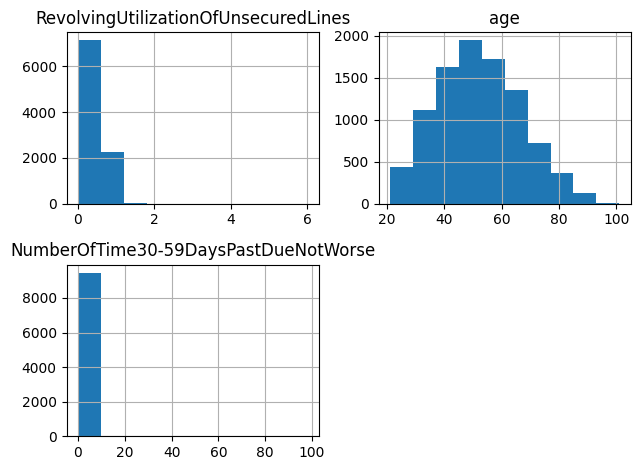

In [215]:
train_set[features_num].hist()
plt.tight_layout()

In [216]:
X_train = train_set[features_num]
y_train = train_set[target]

X_test = test_set[features_num]
y_test = test_set[target]

In [217]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = features)

In [218]:
#importo los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier


#inicializo un clasificador para cada modelo
# con los hiperparam por defecto
model_names = ["Logistic Regression","DecisionTree","Random Forest","LightGBM","KNN"]
lr_clf = LogisticRegression(max_iter = 10000, class_weight='balanced')
tree_clf = DecisionTreeClassifier(random_state= 42, class_weight= 'balanced')
rf_clf = RandomForestClassifier(random_state= 42, class_weight= 'balanced')
lgb_clf = LGBMClassifier(random_state= 42, class_weight= 'balanced', verbose = -100)
KNN = KNeighborsClassifier(n_neighbors=3, weights= 'uniform')

model_set = [lr_clf, tree_clf, rf_clf, lgb_clf, KNN] #cat_clf

In [219]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression": 
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 10, scoring = "recall")
    else:  # para la Logistic Regr necesito el X_train_escalado
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 10, scoring = "recall")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression(class_weight='balanced', max_iter=10000)
DecisionTreeClassifier(class_weight='balanced', random_state=42)
RandomForestClassifier(class_weight='balanced', random_state=42)
LGBMClassifier(class_weight='balanced', random_state=42, verbose=-100)
KNeighborsClassifier(n_neighbors=3)


In [220]:
ganador

'Logistic Regression'

In [234]:
params_grid = {'max_iter' : [1000, 5000, 10000, 15000],
    "C": [0.1,0.5,1],'penalty' :['l1', 'l2', None]}

lr_grid = GridSearchCV(lr_clf,
                       param_grid= params_grid,
                       cv = 10,
                       scoring = "recall",
                       n_jobs = -1)

lr_grid.fit(X_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\PC\AppData\Local\P

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1],
                         'max_iter': [1000, 5000, 10000, 15000],
                         'penalty': ['l1', 'l2', None]},
             scoring='recall')

In [236]:
lr_grid.best_score_

np.float64(0.7329036635006785)

In [237]:
lr_grid.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2197
           1       0.19      0.71      0.29       167

    accuracy                           0.76      2364
   macro avg       0.58      0.74      0.57      2364
weighted avg       0.92      0.76      0.81      2364



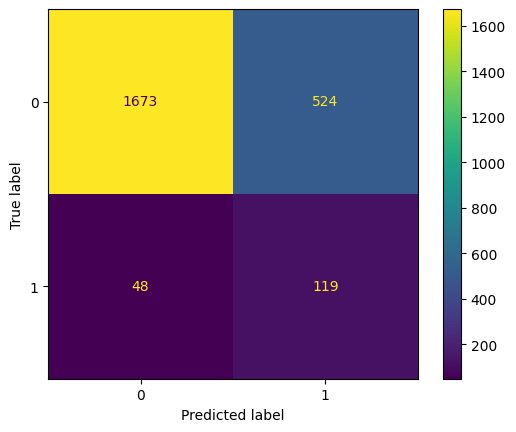

In [ ]:
y_pred = lr_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)